1. Menambahkan beberapa model noise ke citra (A)
2. Melakukan restorasi citra dengan beberapa teknik filtering (spatial filtering, order statistic filtering, adaptive filtering) B dan C
5. Melakukan klasifikasi dengan teknik machine learning dengan input citra yang telah diberi noise dan input citra yang telah direstorasi (2 jenis citra) D dan E

Dataset: https://universe.roboflow.com/research-sakib/deepfruits-9nwps

In [42]:
# Library
import cv2
# from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [43]:
image_path = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\train\1_png_jpg.rf.984e7192df71a24d11825c328d384cce.jpg'
image = cv2.imread(image_path, 0)

# 1. Add Noise to Image

## Nyoba Doang

In [44]:
# image = cv2.imread('/content/3007_png_jpg.rf.4c6722771c524836bbdebf2c46788e76.jpg', 0)
# # image = cv2.imread('/content/1_png_jpg.rf.e0faaf5611f0c56376c6f789785b147f.jpg')

In [45]:
# # Menambahkan Gaussian noise ke gambar
# gaussian_noise = np.random.normal(0, 1, image.shape)
# noisy_image = np.clip(image + gaussian_noise.astype(np.uint8) * 50, 0, 255)
# # Menggunakan filter Gaussian untuk mengaburkan gambar
# blurred_image = cv2.GaussianBlur(noisy_image, (15, 15), 0)

In [46]:
# plt.figure(figsize=(12, 6))

# plt.subplot(131)
# plt.title('Original Image')
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.axis('off')

# plt.subplot(132)
# plt.title('Noisy Image')
# plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
# plt.axis('off')

# plt.subplot(133)
# plt.title('Blurred Image')
# plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
# plt.axis('off')

# plt.show()

## A. Gaussian Noise

gauss(x,y,z)=μ+σ⋅N(0,1)

- μ adalah mean.
- σ adalah deviasi standar (standard deviation).
- N(0,1) adalah noise Gaussian dengan mean 0 dan deviasi standar 1.

In [47]:
def add_gaussian_noise(src, mean=0, std=30):
  dst = src.copy()
  rows, cols = dst.shape
  gaussian_noise = np.zeros((rows, cols)).astype(dst.dtype)
  gaussian_noise = cv2.randn(gaussian_noise, mean, std)
  dst = cv2.add(dst, gaussian_noise)
  return dst

## B. Salt and Paper Noise

Nambahin pixel acak (bisa putih atau item)
- untuk salt (putih) -> image[x,y] = 255
- untuk pepper (item) -> image[x,y] = 0


In [48]:
def add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
  if len(image.shape) == 2:  # Grayscale image
      row, col = image.shape
      noisy_image = np.copy(image)
      num_salt = np.ceil(salt_prob * image.size)
      num_pepper = np.ceil(pepper_prob * image.size)

      # Add salt noise
      coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
      noisy_image[coords[0], coords[1]] = 255

      # Add pepper noise
      coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
      noisy_image[coords[0], coords[1]] = 0
  elif len(image.shape) == 3:  # Color image
      row, col, ch = image.shape
      noisy_image = np.copy(image)
      num_salt = np.ceil(salt_prob * image.size * 0.5)
      num_pepper = np.ceil(pepper_prob * image.size * 0.5)

      # Add salt noise
      coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape[:2]]
      noisy_image[coords[0], coords[1], :] = 255

      # Add pepper noise
      coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape[:2]]
      noisy_image[coords[0], coords[1], :] = 0
  else:
      raise ValueError("Unexpected image shape")

  return noisy_image

## C. Uniform Noise

In [49]:
def add_uniform_noise(image, low=0, high=50):  #semakin tinggi selisih low & high noise makin keliatan
  if len(image.shape) == 2:  # Grayscale image
      row, col = image.shape
      noise = np.random.uniform(low, high, (row, col))
      noisy_image = image + noise
  elif len(image.shape) == 3:  # Color image
      row, col, ch = image.shape
      noise = np.random.uniform(low, high, (row, col, ch))
      noisy_image = image + noise
  else:
      raise ValueError("Unexpected image shape")

  return np.clip(noisy_image, 0, 255).astype(np.uint8)


## D. Exponential Noise

In [50]:
def add_exponential_noise(image, scale=0.1):  #semakin kecil scale makin banyak noise
  if len(image.shape) == 2:  # Grayscale image
      row, col = image.shape
      noise = np.random.exponential(scale, (row, col))
      one_mat = np.ones((row, col)).astype(image.dtype)
      noisy_image = image + image * noise
  elif len(image.shape) == 3:  # Color image
      row, col, ch = image.shape
      noise = np.random.exponential(scale, (row, col, ch))
      one_mat = np.ones((row, col, ch)).astype(image.dtype)
      noisy_image = image + image * noise
  else:
      raise ValueError("Unexpected image shape")

  return np.clip(noisy_image, 0, 255).astype(np.uint8)


## E. Gamma Noise

In [51]:
def add_gamma_noise(image, shape=5, scale=10):
  if len(image.shape) == 2:  # Grayscale image
      row, col = image.shape
      noise = np.random.gamma(shape, scale, (row, col))
      noisy_image = image + noise
  elif len(image.shape) == 3:  # Color image
      row, col, ch = image.shape
      noise = np.random.gamma(shape, scale, (row, col, ch))
      noisy_image = image + noise
  else:
      raise ValueError("Unexpected image shape")

  return np.clip(noisy_image, 0, 255).astype(np.uint8)


## F. Rayleigh Noise

In [52]:
def add_rayleigh_noise(image, scale=0.5):
    if len(image.shape) == 2:  # Grayscale image
        row, col = image.shape
        noise = np.random.rayleigh(scale, (row, col))
        one_mat = np.ones((row, col)).astype(image.dtype)
        noisy_image = image + image * noise
    elif len(image.shape) == 3:  # Color image
        row, col, ch = image.shape
        noise = np.random.rayleigh(scale, (row, col, ch))
        one_mat = np.ones((row, col, ch)).astype(image.dtype)
        noisy_image = image + image * noise
    else:
        raise ValueError("Unexpected image shape")

    return np.clip(noisy_image, 0, 255).astype(np.uint8)

## Show Image

In [53]:
# Add Noise
gaussian_noisy_image = add_gaussian_noise(image)
salt_and_pepper_noisy_image = add_salt_and_pepper_noise(image)
uniform_noisy_image = add_uniform_noise(image)
exponential_noisy_image = add_exponential_noise(image, 0.01)
gamma_noisy_image = add_gamma_noise(image)
rayleigh_noisy_image = add_rayleigh_noise(image)

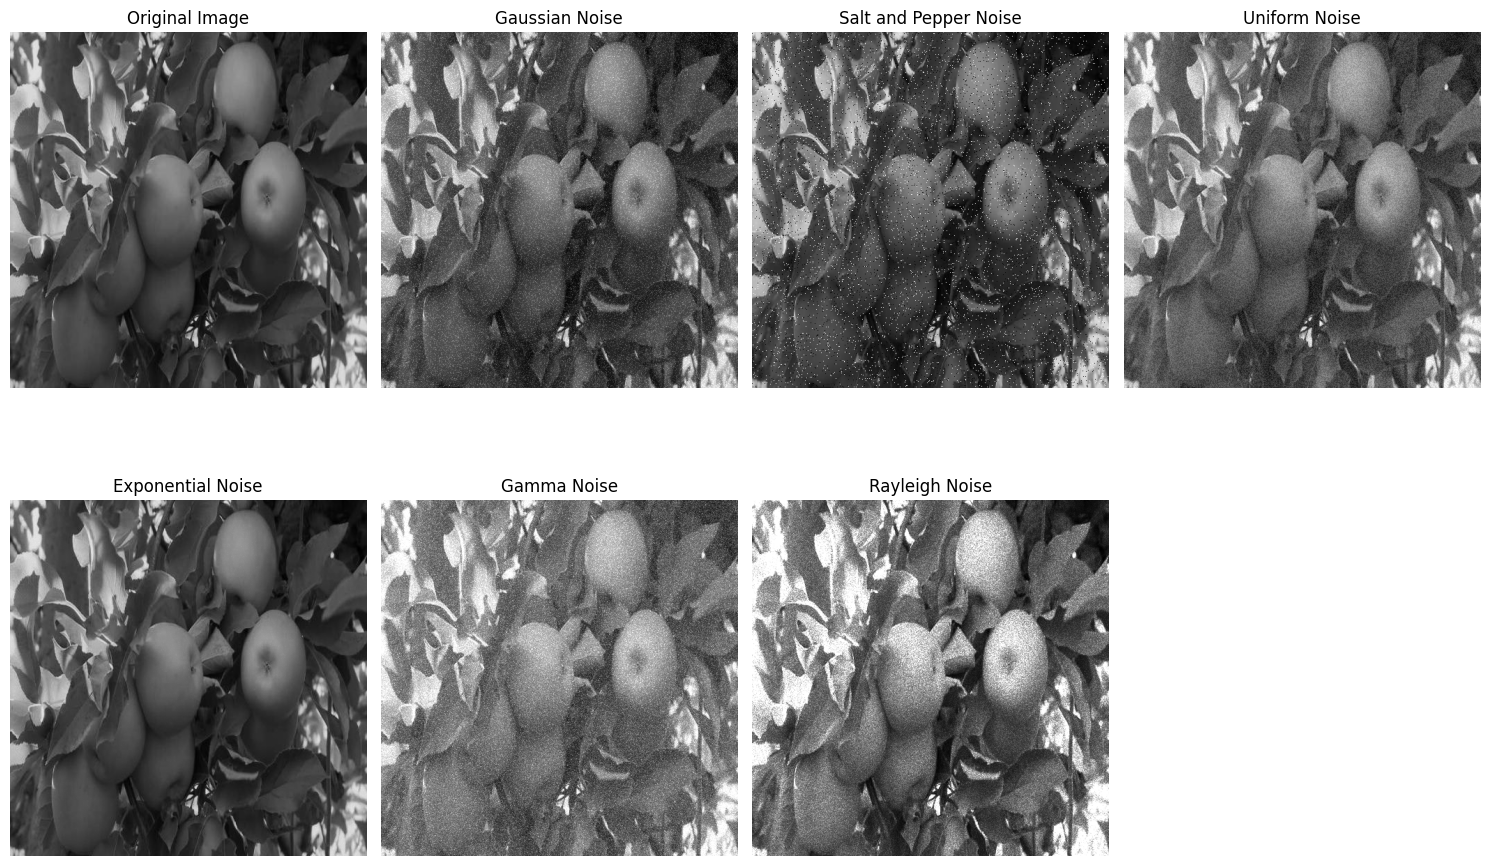

In [54]:
# Show Image
plt.figure(figsize=(15, 10))
plt.subplot(2, 4, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')

plt.subplot(2, 4, 2), plt.imshow(cv2.cvtColor(gaussian_noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Noise'), plt.axis('off')

plt.subplot(2, 4, 3), plt.imshow(cv2.cvtColor(salt_and_pepper_noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Salt and Pepper Noise'), plt.axis('off')

plt.subplot(2, 4, 4), plt.imshow(cv2.cvtColor(uniform_noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Uniform Noise'), plt.axis('off')

plt.subplot(2, 4, 5), plt.imshow(cv2.cvtColor(exponential_noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Exponential Noise'), plt.axis('off')

plt.subplot(2, 4, 6), plt.imshow(cv2.cvtColor(gamma_noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Gamma Noise'), plt.axis('off')

plt.subplot(2, 4, 7), plt.imshow(cv2.cvtColor(rayleigh_noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Rayleigh Noise'), plt.axis('off')

plt.tight_layout()
plt.show()

## + Speckle (dari LKP)

In [55]:
def add_speckle_noise(image, mean=0, std=1):
  gauss = np.random.normal(mean, std, image.shape)
  noisy = image + image * gauss
  return np.clip(noisy, 0, 255).astype(np.uint8)

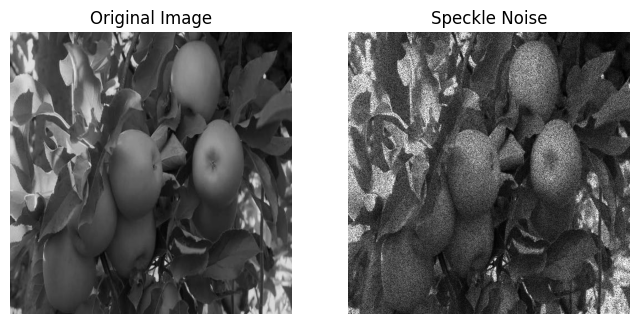

In [56]:
speckle_noisy_image = add_speckle_noise(image, 0, 0.3)

# Tampilkan gambar
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(speckle_noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Speckle Noise')
plt.axis('off')

plt.show()

# List Nama Image

List Image yang bisa dipake:


- gaussian_noisy_image
- salt_and_pepper_noisy_image
- uniform_noisy_image
- exponential_noisy_image
- gamma_noisy_image
- rayleigh_noisy_image
- speckle_noisy_image



# Add Noise ke semua Citra

In [57]:
def Gaussian(input_dir, output_dir, csv_file, csv_output):
    # Membaca file CSV yang berisi informasi kelas-kelas gambar dan nama file
    df = pd.read_csv(csv_file)

    # Membuat direktori output untuk menyimpan gambar yang telah ditambahkan noise
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Membuat DataFrame baru untuk menyimpan informasi hasil pengolahan gambar
    processed_df = pd.DataFrame(columns=['filename'] + list(df.columns[1:]))

    # Looping melalui file gambar dalam direktori input
    for filename in os.listdir(input_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                # Menambahkan noise ke gambar
                noisy_image = add_gaussian_noise(image)
                
                # Simpan gambar yang telah ditambahkan noise
                output_path = os.path.join(output_dir, filename)
                if cv2.imwrite(output_path, noisy_image):
                    print(f"Saved noisy image to {output_path}")
                else:
                    print(f"Failed to save noisy image to {output_path}")

                # Simpan informasi hasil pengolahan gambar ke DataFrame
                class_label = None
                for col in df.columns[1:]:  # Mulai dari indeks 1 karena indeks 0 adalah 'filename'
                    if df.loc[df['filename'] == filename, col].iloc[0] == 1:
                        class_label = col
                        break
                if class_label is not None:
                    # Menambahkan baris baru ke DataFrame
                    processed_df.loc[len(processed_df)] = [filename] + [0] * (len(df.columns) - 1)
                    # Menetapkan nilai kelas yang sesuai menjadi 1
                    processed_df.loc[processed_df['filename'] == filename, class_label] = 1

                # print(f"Processed {filename} with gaussian noise")
    
    print("Processed add noise using gaussian noise to images")

    # Simpan DataFrame hasil pengolahan gambar ke file CSV baru
    processed_csv_file = os.path.join(output_dir, csv_output)
    processed_df.to_csv(processed_csv_file, index=False)
    print(f"Processed CSV file saved as: {processed_csv_file}")

In [58]:
# Folder: Train
# Noise : Gaussian

input_dir = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train'
output_dir = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train_gaussian'
csv_file = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train\_classes.csv'
csv_output = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train_gaussian\_classes.csv'

Gaussian(input_dir, output_dir, csv_file, csv_output)

Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train_gaussian\017_png_jpg.rf.5034925e62f0050f4eaa58e0d15aa8de.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train_gaussian\017_png_jpg.rf.5b2d1629019324de8b354488ed1945ad.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train_gaussian\017_png_jpg.rf.d103168de039d3cbf4b954fc2358a398.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train_gaussian\100_1935_png_jpg.rf.57dd4f995f7a2d8f4f18aa8b1d9ea78c.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train_gaussian\100_1935_png_jpg.rf.65e891ffbe139a706e3a0a14baddd373.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train_gaussian\100_1935_png_jpg.rf.bf57ff30c18318ebe90237fb67fd9850.jpg
S

In [59]:
# Folder: Test
# Noise : Gaussian

input_dir = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test'
output_dir = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test_gaussian'
csv_file = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test\_classes.csv'
csv_output = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test_gaussian\_classes.csv'

Gaussian(input_dir, output_dir, csv_file, csv_output)

Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test_gaussian\2009-09-15_23-09-46_utc-strawberries_png_jpg.rf.0a11ba60196a51c7693de365a753bffa.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test_gaussian\20151125T1143_pic000005_png_jpg.rf.df428e8a8223242dd6a61066ee2b74fe.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test_gaussian\20151125T1143_pic000033_png_jpg.rf.ef75367cfd45d3617b3738afdbfd85d0.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test_gaussian\20151125T1143_pic000068_png_jpg.rf.dc86a13d99a5817a196d371d6309942b.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test_gaussian\20151125T1143_pic000087_png_jpg.rf.1a4634355ee3333dddd33856dc347fa4.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Resto

In [60]:
# Folder: Valid
# Noise : Gaussian

input_dir = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid'
output_dir = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid_gaussian'
csv_file = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid\_classes.csv'
csv_output = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid_gaussian\_classes.csv'

Gaussian(input_dir, output_dir, csv_file, csv_output)

Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid_gaussian\1460105322_1756a2ed7f_png_jpg.rf.8044d40186072b7210b98d0b0bb460db.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid_gaussian\20151125T1138_pic000066_png_jpg.rf.7edfc72a36b76f18427512051d3bdff6.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid_gaussian\20151125T1138_pic000139_png_jpg.rf.fdbc49056a2cc3886fe1a13b1b165371.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid_gaussian\20151125T1138_pic000204_png_jpg.rf.968f8e4dda2f6909b499c3165597a711.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid_gaussian\20151125T1138_pic000290_png_jpg.rf.20ce9059356a64efc4631df24231c54e.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Ima

In [61]:
# Fungsi Salt n Pepper

def SaltPepper(input_dir, output_dir, csv_file, csv_output):
    # Membaca file CSV yang berisi informasi kelas-kelas gambar dan nama file
    df = pd.read_csv(csv_file)

    # Membuat direktori output untuk menyimpan gambar yang telah ditambahkan noise
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Membuat DataFrame baru untuk menyimpan informasi hasil pengolahan gambar
    processed_df = pd.DataFrame(columns=['filename'] + list(df.columns[1:]))

    # Looping melalui file gambar dalam direktori input
    for filename in os.listdir(input_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                # Menambahkan noise ke gambar
                noisy_image = add_salt_and_pepper_noise(image)
                
                # Simpan gambar yang telah ditambahkan noise
                output_path = os.path.join(output_dir, filename)
                if cv2.imwrite(output_path, noisy_image):
                    print(f"Saved noisy image to {output_path}")
                else:
                    print(f"Failed to save noisy image to {output_path}")

                class_label = None
                for col in df.columns[1:]:
                    if df.loc[df['filename'] == filename, col].iloc[0] == 1:
                        class_label = col
                        break
                if class_label is not None:
                    processed_df.loc[len(processed_df)] = [filename] + [0] * (len(df.columns) - 1)
                    processed_df.loc[processed_df['filename'] == filename, class_label] = 1

                # print(f"Processed {filename} with salt noise")
    
    print("Processed add noise using salt and pepper noise to images")

    # Simpan DataFrame hasil pengolahan gambar ke file CSV baru
    processed_csv_file = os.path.join(output_dir, csv_output)
    processed_df.to_csv(processed_csv_file, index=False)
    print(f"Processed CSV file saved as: {processed_csv_file}")

In [62]:
# Folder: Train
# Noise : Salt and pepper

input_dir = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train'
output_dir = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train_salt'
csv_file = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train\_classes.csv'
csv_output = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train_salt\_classes.csv'

SaltPepper(input_dir, output_dir, csv_file, csv_output)

Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train_salt\017_png_jpg.rf.5034925e62f0050f4eaa58e0d15aa8de.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train_salt\017_png_jpg.rf.5b2d1629019324de8b354488ed1945ad.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train_salt\017_png_jpg.rf.d103168de039d3cbf4b954fc2358a398.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train_salt\100_1935_png_jpg.rf.57dd4f995f7a2d8f4f18aa8b1d9ea78c.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train_salt\100_1935_png_jpg.rf.65e891ffbe139a706e3a0a14baddd373.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\train_salt\100_1935_png_jpg.rf.bf57ff30c18318ebe90237fb67fd9850.jpg
Saved noisy image to C:\U

In [63]:
# Folder: Test
# Noise : Salt and pepper

input_dir = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test'
output_dir = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test_salt'
csv_file = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test\_classes.csv'
csv_output = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test_salt\_classes.csv'

SaltPepper(input_dir, output_dir, csv_file, csv_output)

Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test_salt\2009-09-15_23-09-46_utc-strawberries_png_jpg.rf.0a11ba60196a51c7693de365a753bffa.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test_salt\20151125T1143_pic000005_png_jpg.rf.df428e8a8223242dd6a61066ee2b74fe.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test_salt\20151125T1143_pic000033_png_jpg.rf.ef75367cfd45d3617b3738afdbfd85d0.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test_salt\20151125T1143_pic000068_png_jpg.rf.dc86a13d99a5817a196d371d6309942b.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\test_salt\20151125T1143_pic000087_png_jpg.rf.1a4634355ee3333dddd33856dc347fa4.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restora

In [64]:
# Folder: Valid
# Noise : Salt n Pepper

input_dir = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid'
output_dir = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid_salt'
csv_file = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid\_classes.csv'
csv_output = r'C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid_salt\_classes.csv'

SaltPepper(input_dir, output_dir, csv_file, csv_output)

Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid_salt\1460105322_1756a2ed7f_png_jpg.rf.8044d40186072b7210b98d0b0bb460db.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid_salt\20151125T1138_pic000066_png_jpg.rf.7edfc72a36b76f18427512051d3bdff6.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid_salt\20151125T1138_pic000139_png_jpg.rf.fdbc49056a2cc3886fe1a13b1b165371.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid_salt\20151125T1138_pic000204_png_jpg.rf.968f8e4dda2f6909b499c3165597a711.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid_salt\20151125T1138_pic000290_png_jpg.rf.20ce9059356a64efc4631df24231c54e.jpg
Saved noisy image to C:\Users\nia\OneDrive\Documents\. Sem 6\Image-Restoration\Image-Restoration\valid